[Dataset](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles) captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website.

# 1. Import Libraries <a id='import_lib'></a>

In [ ]:
!pip install mlxtend -qq

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

from scipy.stats import shapiro
import pickle
import h5py
import requests
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

# 2. Set Options <a id='set_options'></a>

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

# 3. Read Data <a id='Read_Data'></a>

In [3]:
data = pd.read_csv("/content/CO2 Emissions_Canada.csv")

data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.000000,4,AS5,Z,9.900000,6.700000,8.500000,33,196
1,ACURA,ILX,COMPACT,2.400000,4,M6,Z,11.200000,7.700000,9.600000,29,221
2,ACURA,ILX HYBRID,COMPACT,1.500000,4,AV7,Z,6.000000,5.800000,5.900000,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.500000,6,AS6,Z,12.700000,9.100000,11.100000,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.500000,6,AS6,Z,12.100000,8.700000,10.600000,27,244


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

# 4. Exploratory Data Analysis <a id='data_preparation'></a>

## 4.1 Preparing the Dataset <a id='Data_Preparing'></a>

**Renaming Columns**

In [5]:
data = data.rename(columns={
    'Vehicle Class': 'Vehicle_Class',
    'Engine Size(L)': 'Engine_Size',
    'Fuel Type': 'Fuel_Type',
    'Fuel Consumption City (L/100 km)': 'Fuel_Consumption_City',
    'Fuel Consumption Hwy (L/100 km)': 'Fuel_Consumption_Hwy',
    'Fuel Consumption Comb (L/100 km)': 'Fuel_Consumption_Comb',
    'Fuel Consumption Comb (mpg)': 'Fuel_Consumption_Comb1',
    'CO2 Emissions(g/km)': 'CO2_Emissions'
})

### 4.1.1 Data Dimensions <a id='Data_Shape'></a>

In [6]:
data.shape

(7385, 12)

In this dataset we have 7384 records across 12 features

### 4.1.2 Data Types <a id='Data_Types'></a>

In [7]:
data.dtypes

Make                       object
Model                      object
Vehicle_Class              object
Engine_Size               float64
Cylinders                   int64
Transmission               object
Fuel_Type                  object
Fuel_Consumption_City     float64
Fuel_Consumption_Hwy      float64
Fuel_Consumption_Comb     float64
Fuel_Consumption_Comb1      int64
CO2_Emissions               int64
dtype: object

The dataset contains **5 object columns, 3 int column and 4 float columns**

### 4.1.3 Missing Values <a id='Missing_Values'></a>

In [8]:
missing_value = pd.DataFrame({
    'Missing Value': data.isnull().sum(),
    'Percentage': (data.isnull().sum() / len(data))*100
})

In [9]:
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
Make,0,0.000000
Model,0,0.000000
Vehicle_Class,0,0.000000
Engine_Size,0,0.000000
Cylinders,0,0.000000
Transmission,0,0.000000
Fuel_Type,0,0.000000
Fuel_Consumption_City,0,0.000000
Fuel_Consumption_Hwy,0,0.000000
Fuel_Consumption_Comb,0,0.000000


There are **no missing values** present in this dataset

### 4.1.4 Duplicate Data <a id='duplicate'></a>

In [10]:
duplicate = data.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 1103 duplicated rows in the data


In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.reset_index(inplace=True, drop=True)

Now, the dataset has **6281 records and 12 features with no missing and duplicate values**

## 4.2  Data Understanding <a id='Data_Understanding'></a>

### 4.2.1 Summary Statistics <a id='Summary_Statistics'></a>

In [13]:
data.describe(include=np.number)

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


1. The average amount of CO2 emitted from cars is 251 g/km
2. Atleast 4 Litres of fuel is consumed be it the car is on city roads or highway
3. About 75% of the cars have 6 or less cylinders
4. The amount of fuel consumed by cars on city roads is comparitvely greater than that of highway

In [14]:
data.describe(include = object)

,Make,Model,Vehicle_Class,Transmission,Fuel_Type
count,6282,6282,6282,6282,6282
unique,42,2053,16,27,5
top,FORD,F-150 FFV,SUV - SMALL,AS6,X
freq,577,32,1006,1139,3039


1. There are a total of 42 different car companies with 2053 different car models
2. Vehicles are divided into 16 different classes with SUV-Small vehicles frequenting the most
3. 4 different types of fuels used by cars have been identified and fuel X seems to be the most famous
4. Most of the cars have AS6 transmission

### 4.2.2 Correlation <a id='correlation'></a>

In [15]:
data_num_features = data.select_dtypes(include=np.number)

print('The numerical columns in the dataset are: ',data_num_features.columns)

The numerical columns in the dataset are:  Index(['Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb',
       'Fuel_Consumption_Comb1', 'CO2_Emissions'],
      dtype='object')


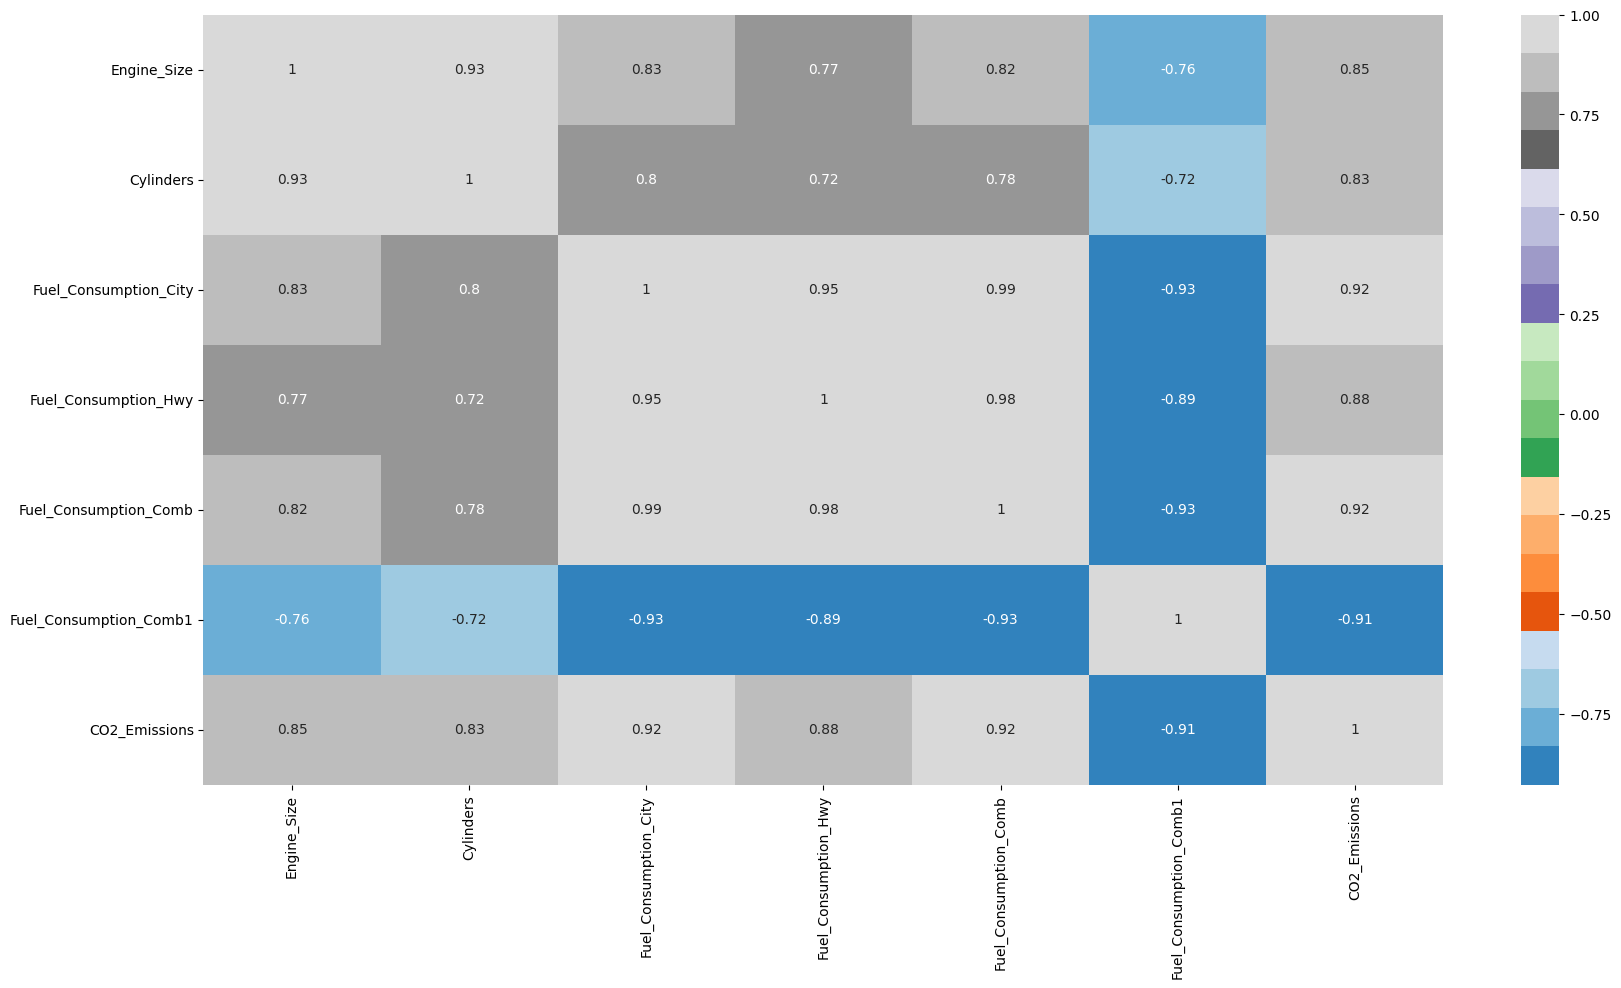

In [16]:
plt.figure(figsize=(20,10))

corr =  data_num_features.corr()

corr =data_num_features.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20c')
plt.show()

1. Fuel_Consumption_Comb1 has a high negative correaltion(<-0.9) with CO2_Emissions, Fuel_Consumption_Comb and Fuel_Consumption_City
2. CO2_Emissions has high positive correlation(>0.9) with Fuel_Consumption_Comb and Fuel_Consumption_City

### 4.2.3 Analyse Categorical Variables <a id='analyze_cat_var'></a>

In [17]:
data_cat_features = data.select_dtypes(include='object')
data_cat_features1 = data_cat_features[['Vehicle_Class', 'Transmission', 'Fuel_Type', 'Model','Make']]

TypeError: ignored

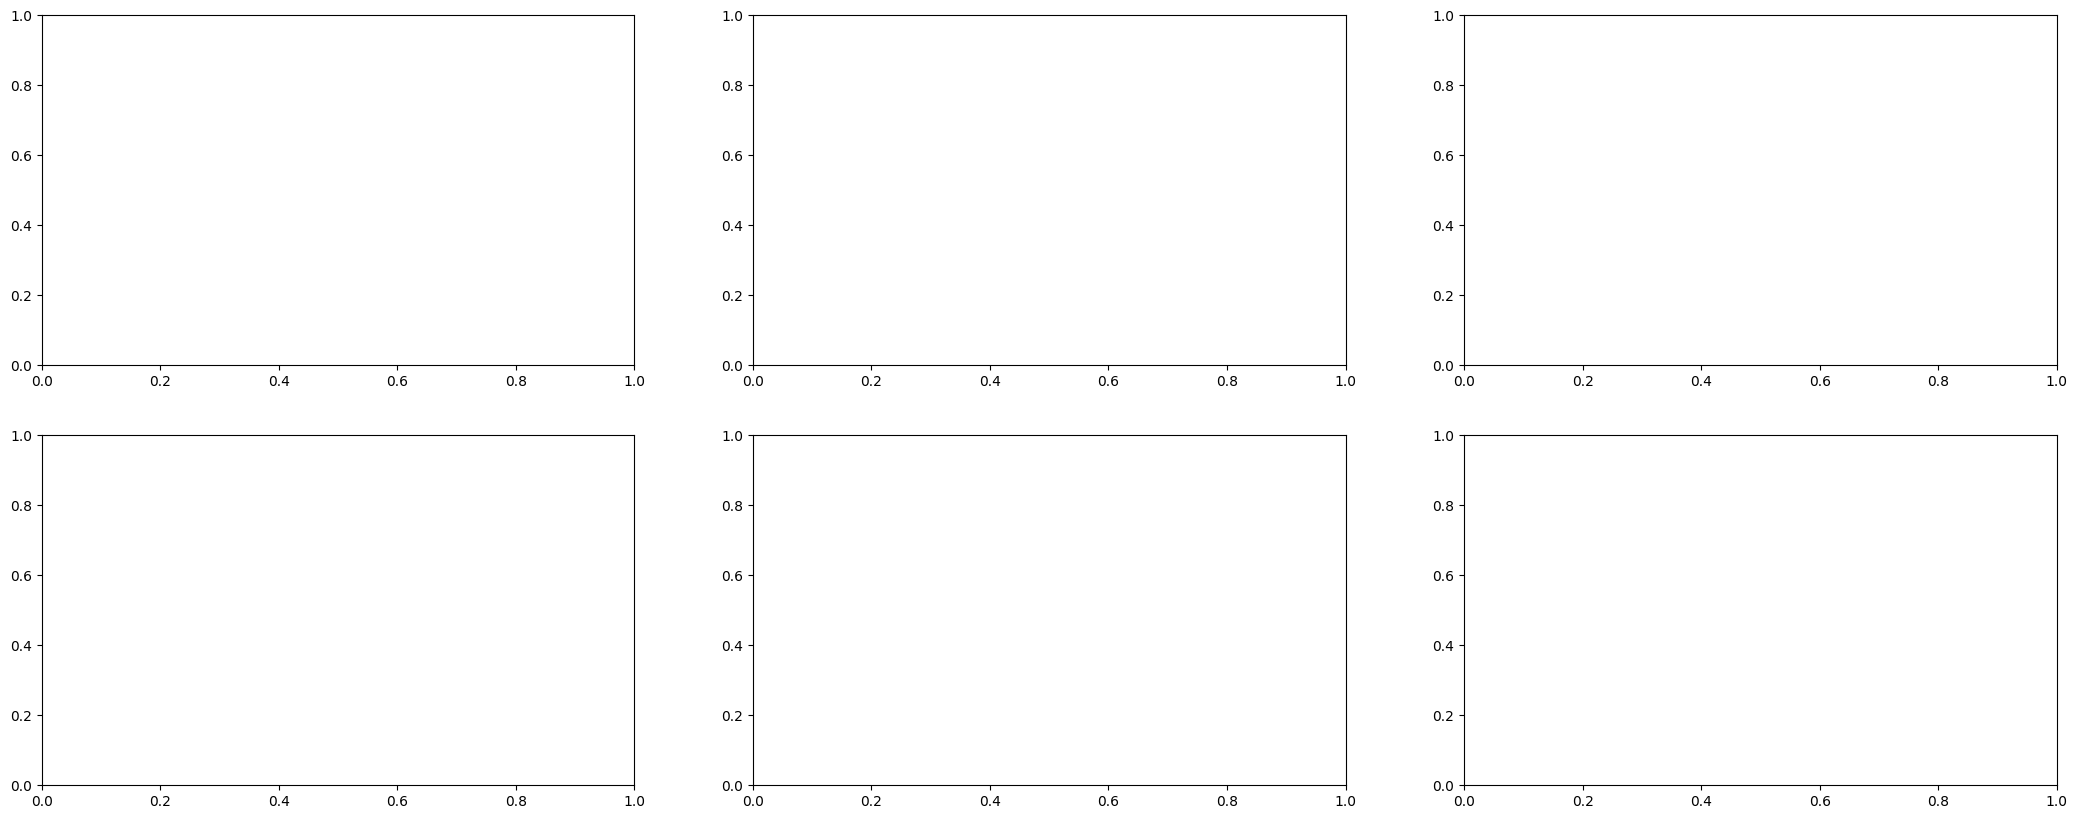

In [18]:
fig,ax= plt.subplots(nrows=2,ncols=3,figsize=(26, 10))

for variable, subplot in zip(data_cat_features1.columns,ax.flatten()):
    cat_count  = data[variable].value_counts()
    cat_count10 = cat_count[:10,]
    z = sns.barplot(cat_count10.values,cat_count10.index, alpha=0.8, ax=subplot)
    if cat_count.size > 10:
        z.set_title('Top 10 {}'.format(variable))
    else:
        z.set_title(variable)
    z.set_xlabel('Number of Cars', fontsize=9)

fig.delaxes(ax[1][2])

1. Top 10 Make: Most of the cars on Canadian roads are made by Ford
2. Top 10 Model: The F-150 FFV is amongst the most famous models driven in Canada
3. Top 10 Vehicle_Class: SUV-Small is the preferred class of vehicle amongst the Canadians
4. Top 10 Transmission: More than 1000 cars have AS6 and AS8 transmission types
5. Fuel Type: Majority of the cars in Canada use Fuel type X and Z

### 4.2.4 Analyse Target Variable <a id='analyze_tar_var'></a>

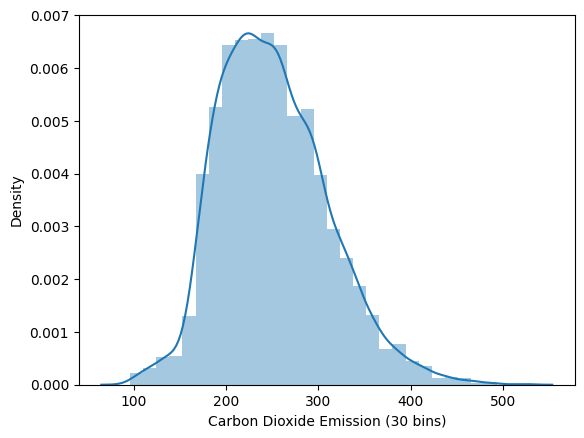

In [19]:
sns.distplot(data['CO2_Emissions'], bins=30, kde=True, axlabel='Carbon Dioxide Emission (30 bins)')
plt.show()

From the above histogram, we can see that CO2_Emissions is moderately positive skewed

In [20]:
mean = data['CO2_Emissions'].mean()
mode = data['CO2_Emissions'].mode()
median = data['CO2_Emissions'].median()

print(f'Mean for CO2 Emission is {mean}')
print(f'Median for CO2 Emission is {median}')
print(f'Mode for CO2 Emission is {mode}')

Mean for CO2 Emission is 251.1577523081821
Median for CO2 Emission is 246.0
Mode for CO2 Emission is 0    221
1    246
Name: CO2_Emissions, dtype: int64


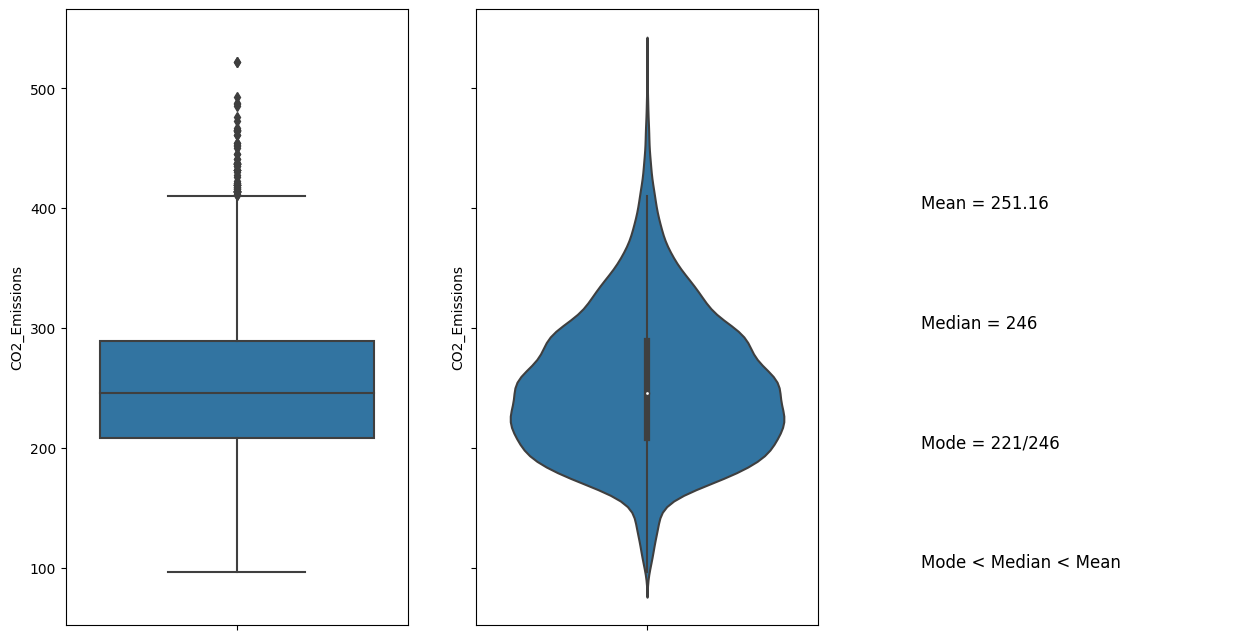

In [21]:
fig, axes = plt.subplots(1,3, sharey=True, figsize=(15,8))
sns.boxplot(y=data['CO2_Emissions'], orient="v", ax = axes[0])
sns.violinplot(y=data['CO2_Emissions'], orient="v", ax = axes[1]);
plt.text(0.1, 200, "Mode = 221/246", fontsize=12)
plt.text(0.1, 300, "Median = 246", fontsize=12)
plt.text(0.1, 400, "Mean = 251.16", fontsize=12)
plt.text(0.1, 100, "Mode < Median < Mean", fontsize=12)
plt.axis("off")
plt.show()

Of all the three statistics, the mean is the largest, while the mode is the smallest thus CO2_Emissions is positively skewed which implies that most of the CO2 Emissions are less than the average CO2 Emissions.

### 4.2.5 Analyse Relationship between Target and Independent Variables <a id='analyze_tar_ind_var'></a>

In [22]:
make_co2 = data.groupby('Make')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
model_co2 = data.groupby('Model')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
vehicle_class_co2 = data.groupby('Vehicle_Class')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
transmission_co2 = data.groupby('Transmission')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
fuel_type_co2 = data.groupby('Fuel_Type')['CO2_Emissions'].mean().sort_values(ascending=False).head()

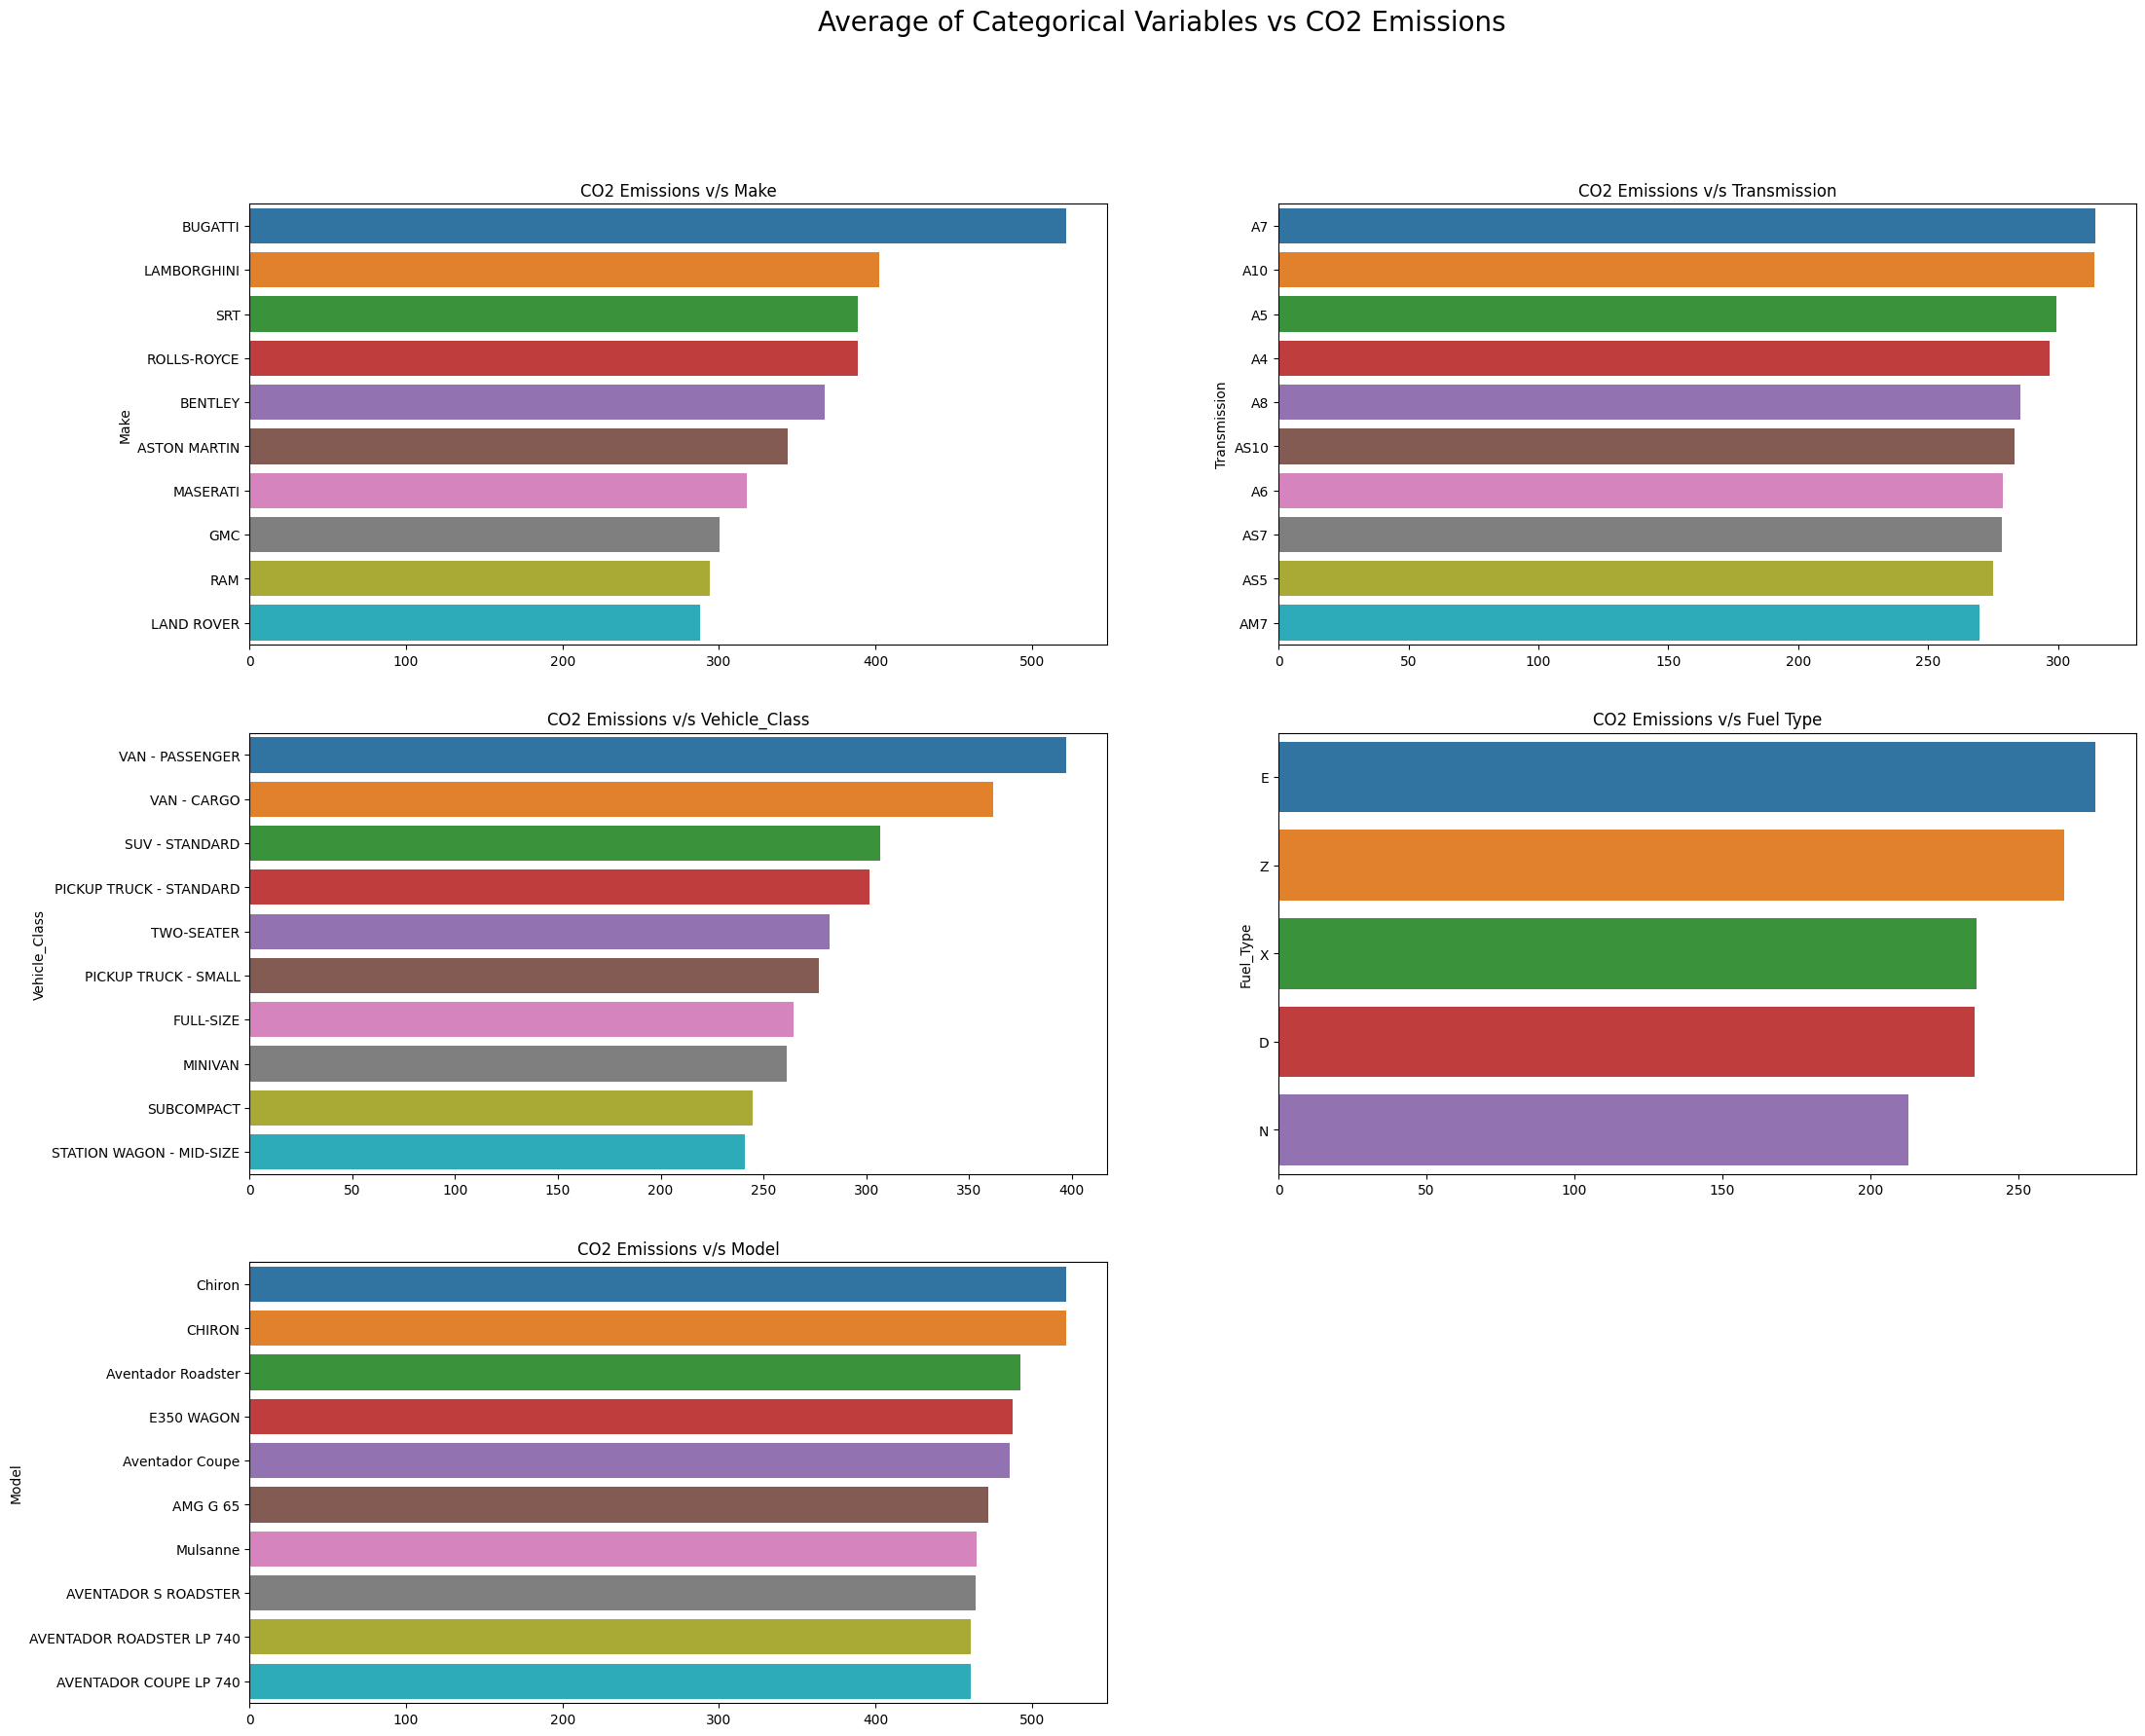

In [23]:
fig, axes = plt.subplots(3,2, figsize=(25,20))
fig.suptitle('Average of Categorical Variables vs CO2 Emissions', size=20)

sns.barplot(ax=axes[0][0],x = make_co2.values,y = make_co2.index)
axes[0][0].set_title('CO2 Emissions v/s Make')

sns.barplot(ax=axes[0][1],x = transmission_co2.values,y = transmission_co2.index)
axes[0][1].set_title('CO2 Emissions v/s Transmission')

sns.barplot(ax=axes[1][0],x = vehicle_class_co2.values,y = vehicle_class_co2.index)
axes[1][0].set_title('CO2 Emissions v/s Vehicle_Class')

sns.barplot(ax=axes[1][1], x=fuel_type_co2.values,y=fuel_type_co2.index)
axes[1][1].set_title('CO2 Emissions v/s Fuel Type')

sns.barplot(ax=axes[2][0],x = model_co2.values,y = model_co2.index)
axes[2][0].set_title('CO2 Emissions v/s Model')


fig.delaxes(axes[2][1])
plt.show()

1. CO2 Emissions v/s Make: While Ford cars are mainly found on the roads of Canada , its Bugatti that emit the most CO2 per car
2. CO2 Emissions v/s Model: Bugatti Chiron is amongst the most CO2 emitting car model
3. CO2 Emissions v/s Vehicle_Class: Most of the heavy vehicles like Vans , SUV and Pick-up truck are amongst the top few emitters of CO2
4. CO2 Emissions v/s Transmission: Most of the cars with automatic transmission emit CO2
5. CO2 Emissions v/s Fuel_Type: Cars using Fuel Type E are emitting the most CO2

**Relationship between Cylinders and CO2 Emissions**

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
sns.scatterplot('CO2_Emissions','Cylinders',hue='Fuel_Type')
plt.xlabel("CO2 Emissions", fontsize=10)
plt.ylabel("Cylinders", fontsize=10)
plt.show()

TypeError: ignored

From the above scatter plot we can see that:
1. As the number of cylinders increase, the CO2 emissions increase
2. Cars with 8 and less than 8 cylinders prefer using Fuel Type X which result in less emissions of CO2
3. Fuel Type Z results in more CO2 emissions than the other

<Figure size 1000x500 with 0 Axes>

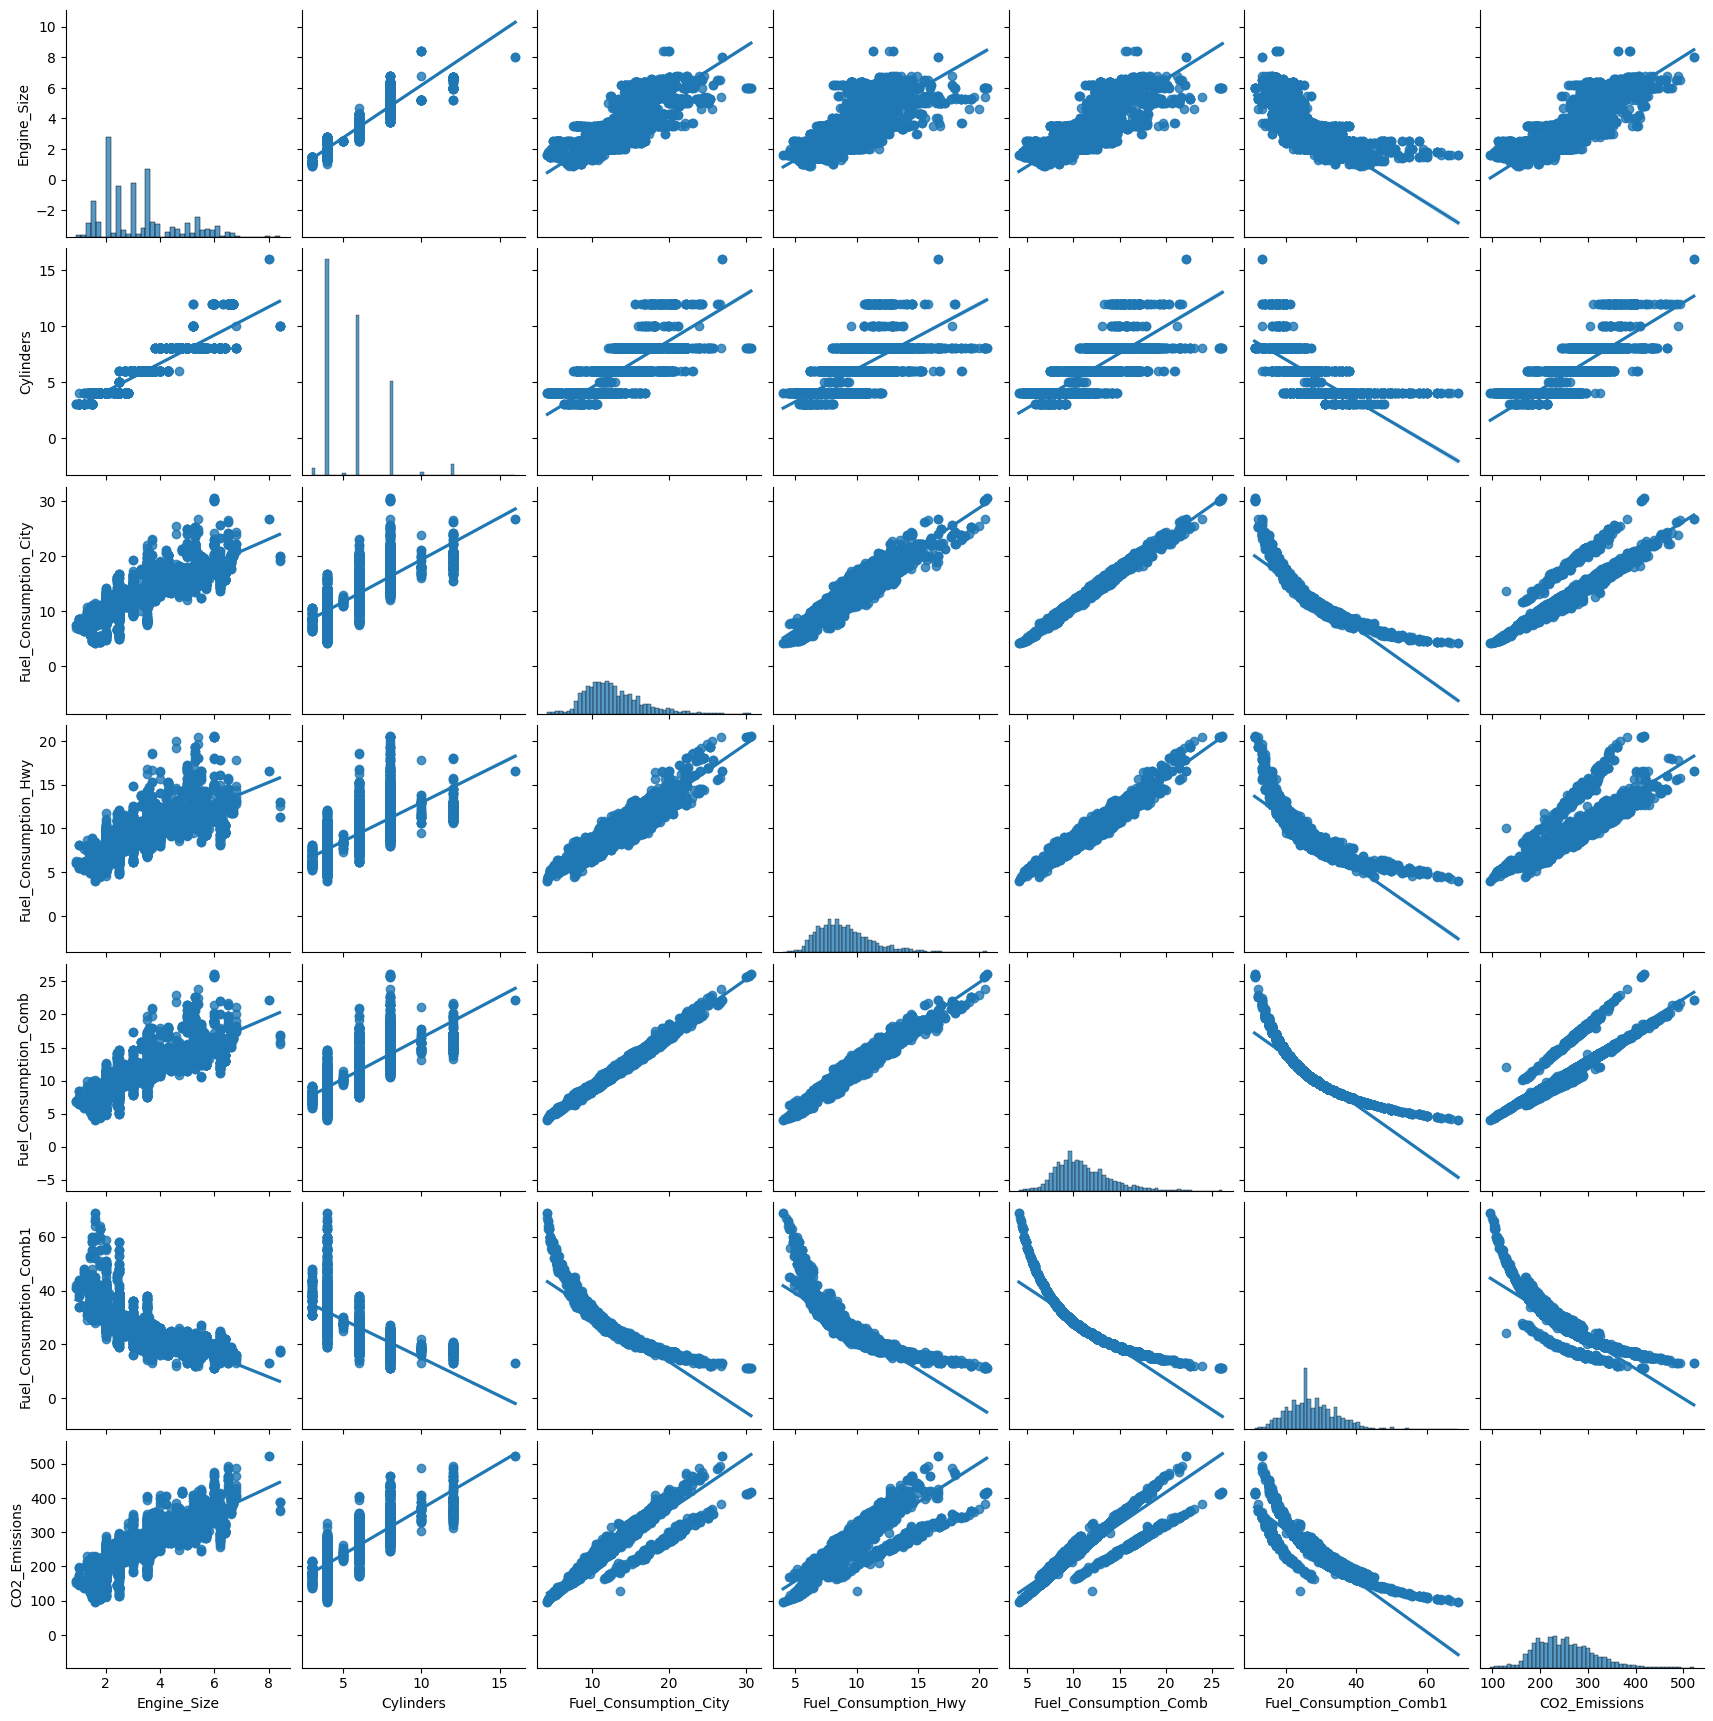

In [24]:
plt.figure(figsize=(10,5))
sns.pairplot(data,kind="reg")
plt.show()

1. Fuel_Consumption_Comb1 shows a negative relation with all the other numerical variables
2. Fuel_Consumption_City and Fuel_Consumption_Hwy are strongly postively related

### 4.2.6 Feature Engineering <a id='feature_eng'></a>

Create a new feature Make_Type by combining various car companies(Make) on the basis of their functionality
<br>
There are 42 unique Car Companies. We will divide these companies into Luxury, Sports, Premium and General cars

In [25]:
data['Make_Type'] = data['Make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI', 'JAGUAR','SRT'], 'Sports')
data['Make_Type'] = data['Make_Type'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC','INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ','MINI', 'SMART', 'VOLVO'],'Premium')
data['Make_Type'] = data['Make_Type'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',  'GENESIS'], 'Luxury')
data['Make_Type'] = data['Make_Type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA', 'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI','NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA','VOLKSWAGEN'],'General')

In [26]:
data.drop(['Make'], inplace=True, axis=1)

data['Make_Type'].unique()

array(['Luxury', 'Premium', 'Sports', 'General'], dtype=object)

In [27]:
data['Make_Type'].value_counts()

General    2776
Premium    2731
Sports      546
Luxury      229
Name: Make_Type, dtype: int64

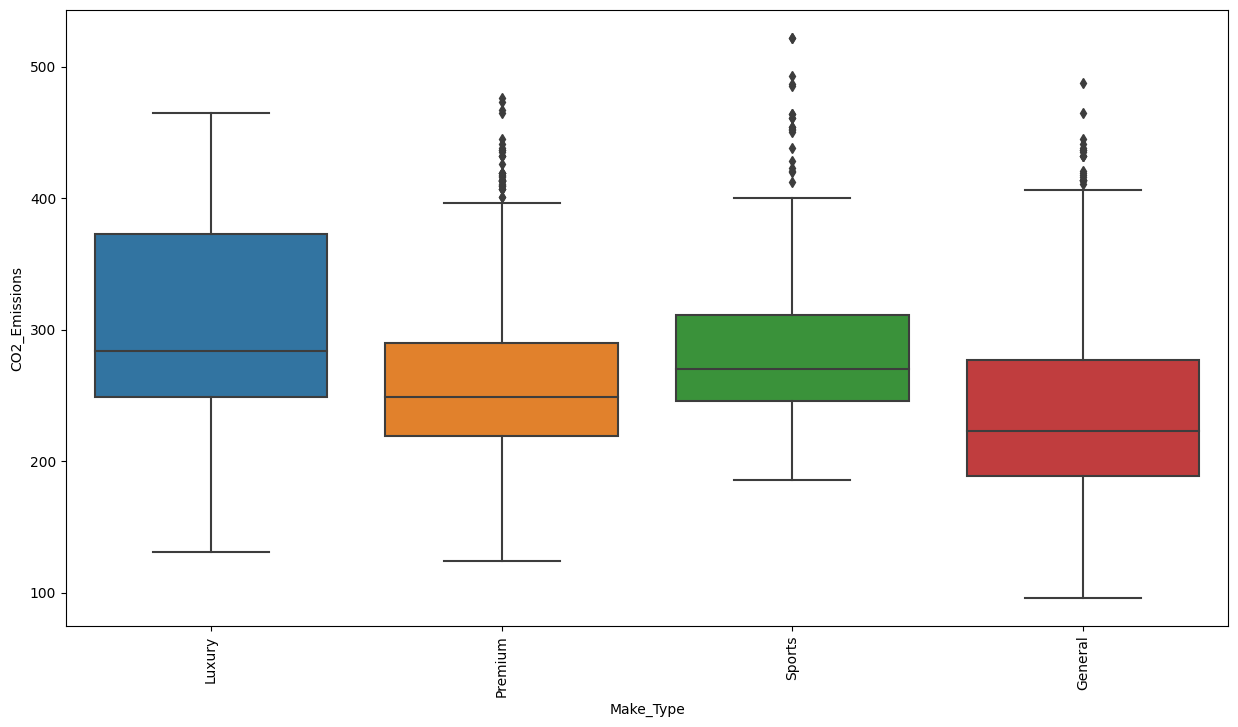

In [28]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Make_Type", y="CO2_Emissions", data=data)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
plt.show()

The plot shows that Sports cars and Luxury cars emit more CO2 compared to Premium and General use cars

Create a new feature Vehicle_Class_Type by combining various Vehicle_Class on the basis of their size
<br>
There are 16 unique Vehicle Classes. We will divide them into Hatchback, Sedan, SUV and Truck

In [29]:
data['Vehicle_Class_Type'] = data['Vehicle_Class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'], 'Hatchback')
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL', 'STATION WAGON - MID-SIZE'],'Sedan')
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'],  'SUV')
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE', 'PICKUP TRUCK - SMALL'], 'Truck')

In [30]:
data.drop(['Vehicle_Class'], inplace=True,  axis=1)

data['Vehicle_Class_Type'].unique()

array(['Hatchback', 'SUV', 'Sedan', 'Truck'], dtype=object)

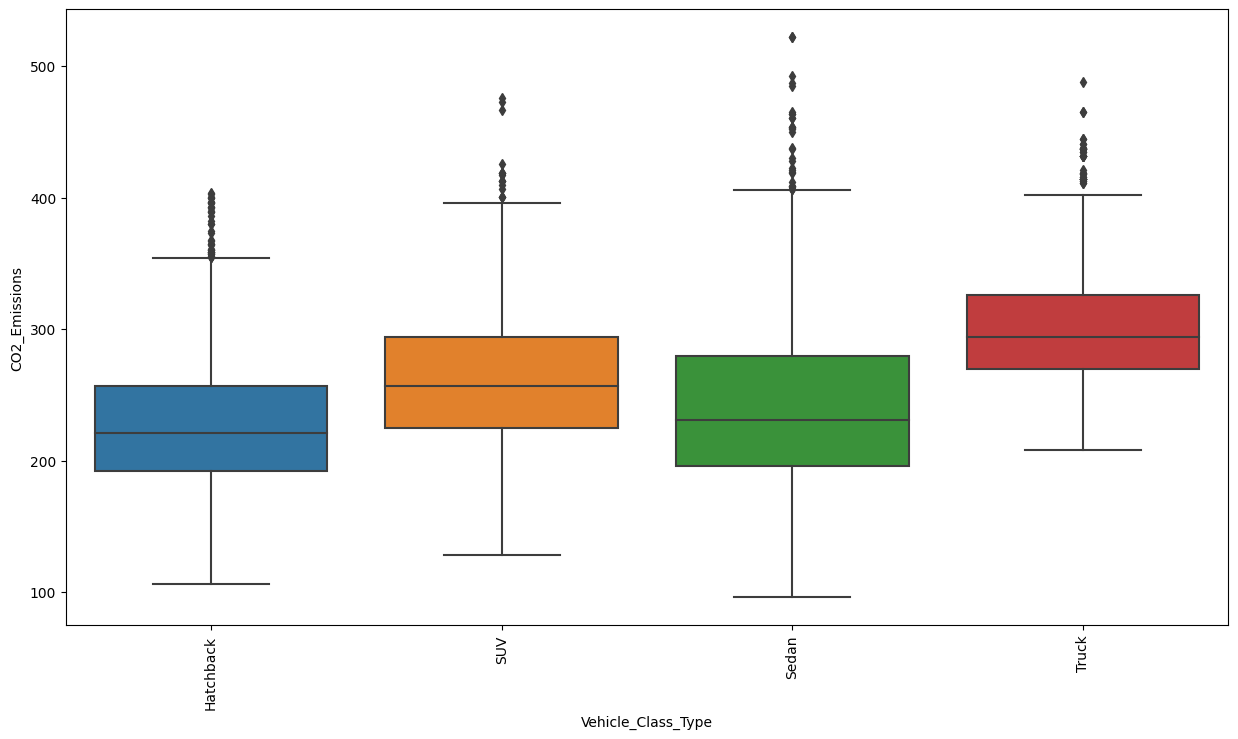

In [31]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Vehicle_Class_Type", y="CO2_Emissions", data=data)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
plt.show()

The plot shows that the bigger the cars are the more CO2 they emit

# 5. Data Preprocessing <a id='data_pre'></a>

In [32]:
data.drop(['Model'],axis=1,inplace=True)

Since Model has 2053 unique values and has no significance with respect to CO2 Emissions , we have dropped this column

## 5.1 Outliers <a id='out'></a>

### 5.1.1 Discovery of Outliers<a id='dis_out'></a>

In [33]:
df_num_features=data.select_dtypes(include=np.number)

**Identifying outliers using IQR**

In [34]:
Q1 = df_num_features.quantile(0.25)
Q3 = df_num_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Engine_Size               1.700000
Cylinders                 2.000000
Fuel_Consumption_City     4.600000
Fuel_Consumption_Hwy      2.800000
Fuel_Consumption_Comb     3.800000
Fuel_Consumption_Comb1   10.000000
CO2_Emissions            81.000000
dtype: float64


In [35]:
outlier = pd.DataFrame((df_num_features < (Q1 - 1.5 * IQR)) | (df_num_features > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column Engine_Size are 121
Total number of Outliers in column Cylinders are 177
Total number of Outliers in column Fuel_Consumption_City are 116
Total number of Outliers in column Fuel_Consumption_Hwy are 150
Total number of Outliers in column Fuel_Consumption_Comb are 115
Total number of Outliers in column Fuel_Consumption_Comb1 are 95
Total number of Outliers in column CO2_Emissions are 74


**Visualizing outliers using Boxplots**

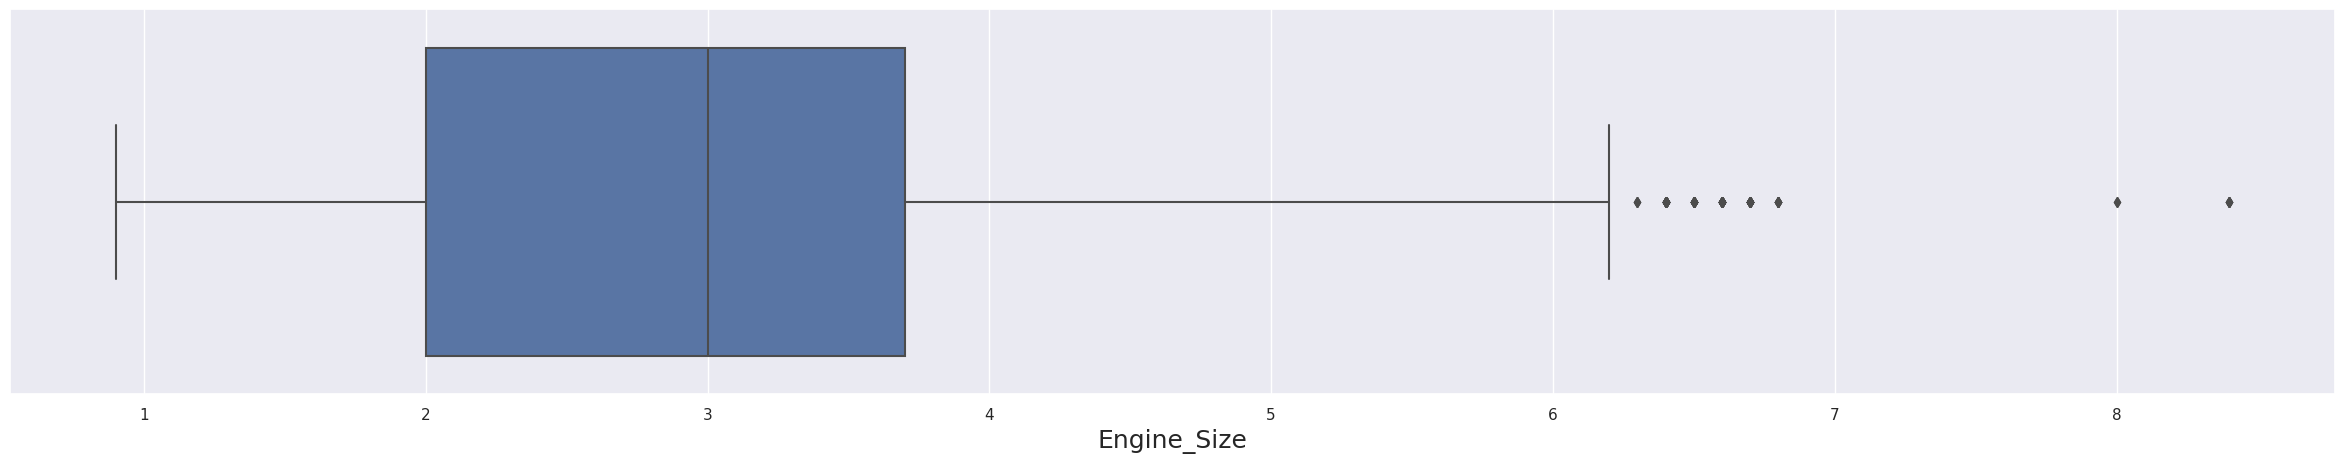

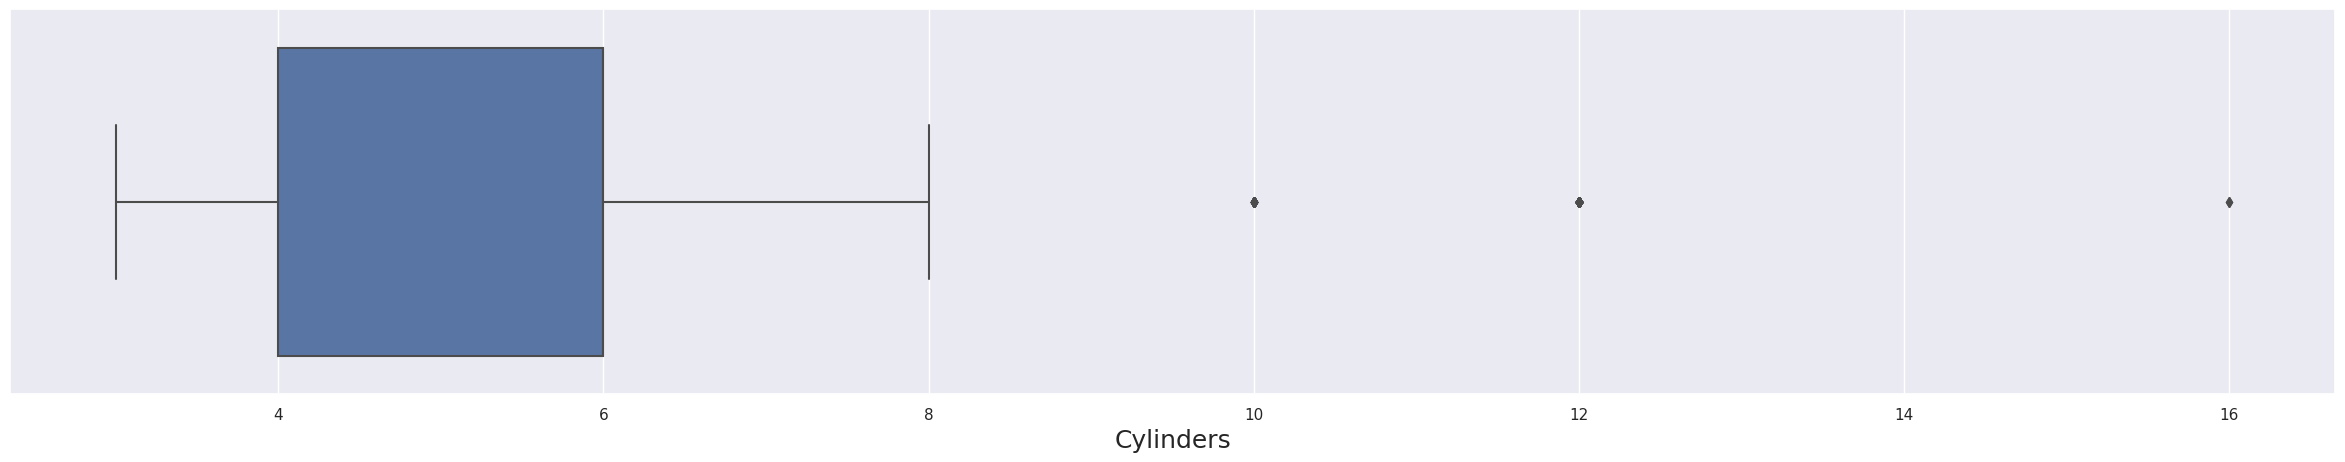

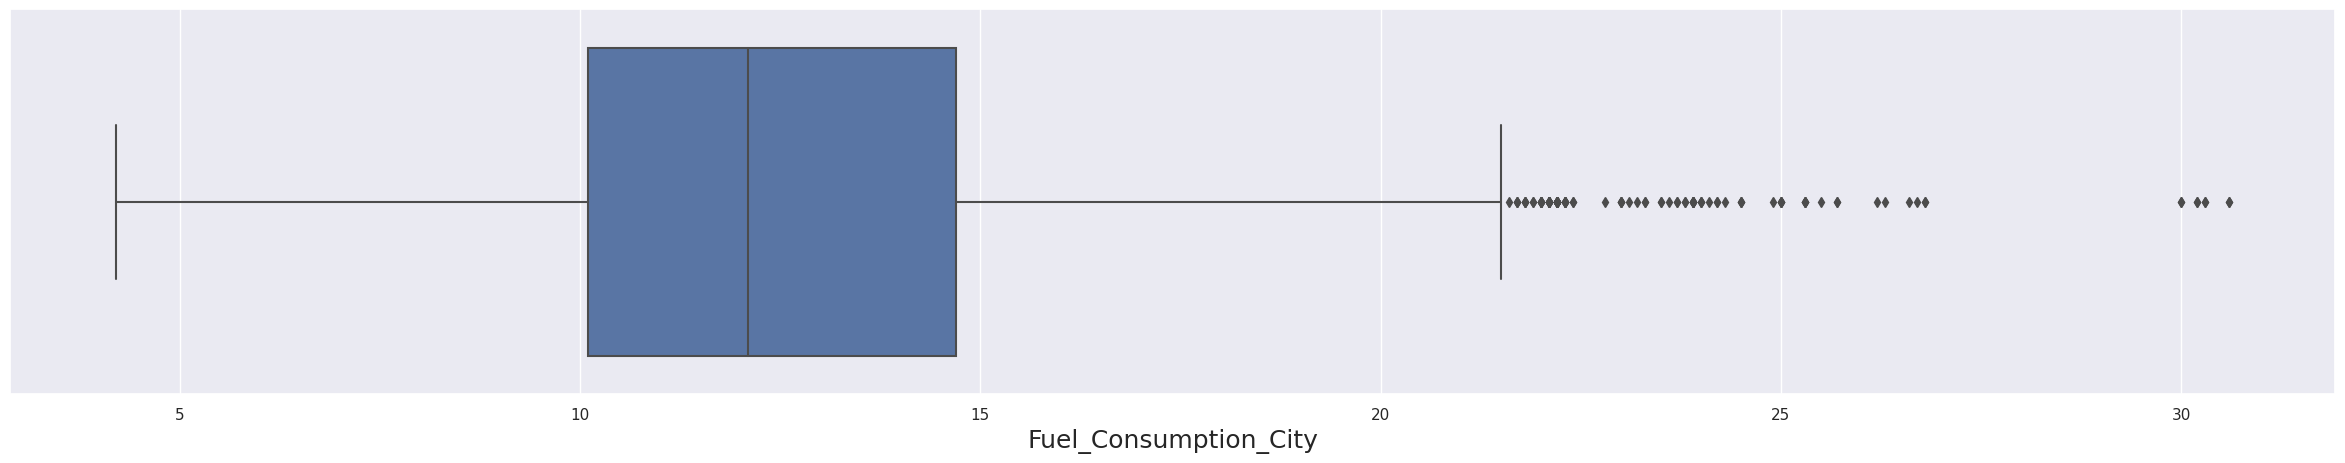

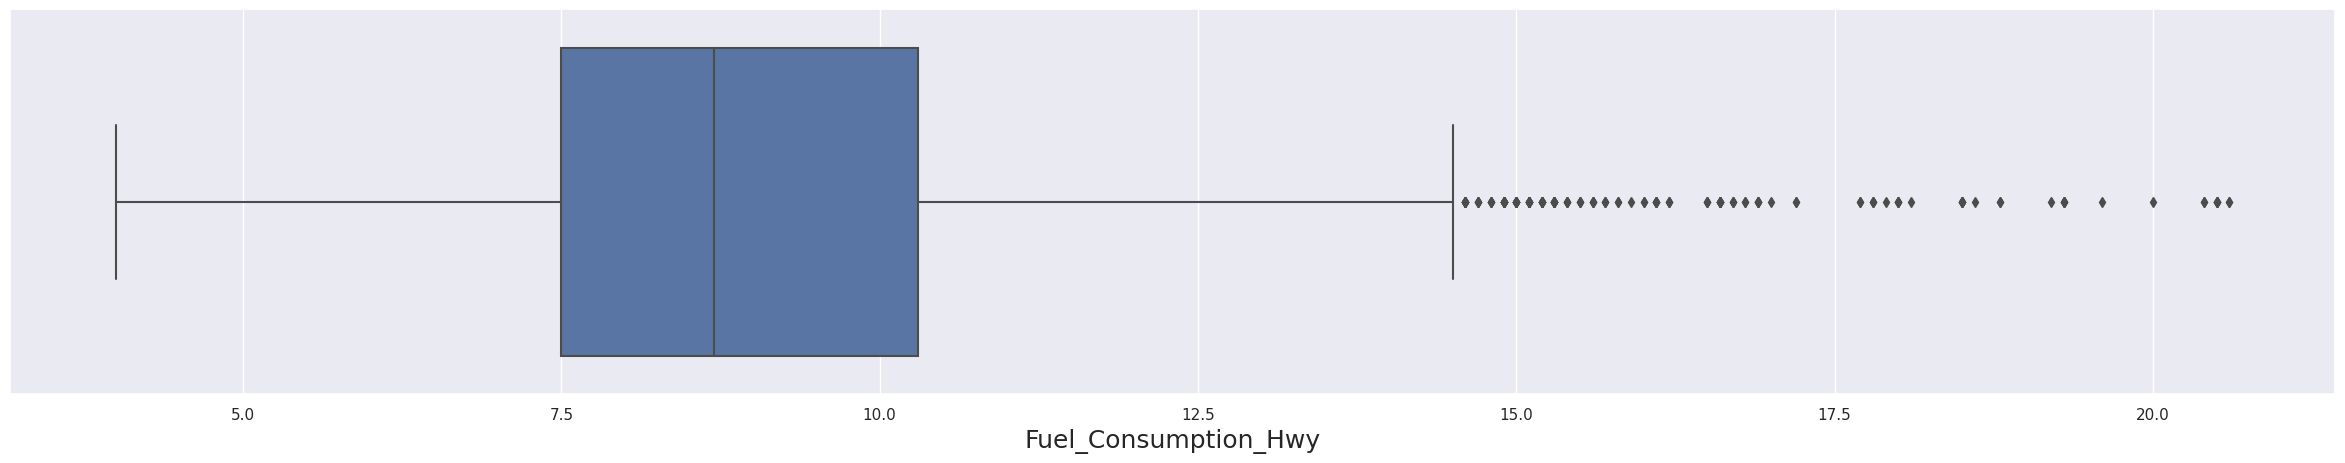

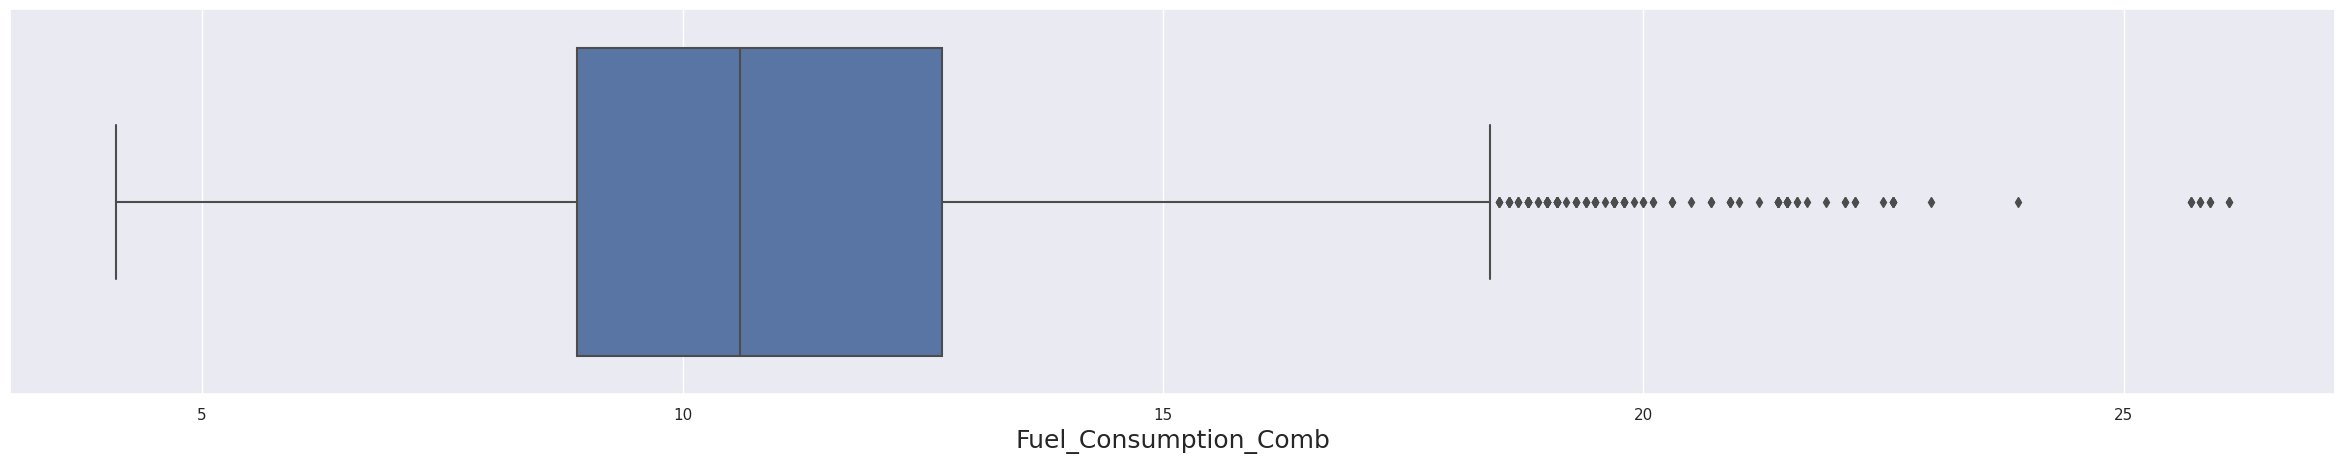

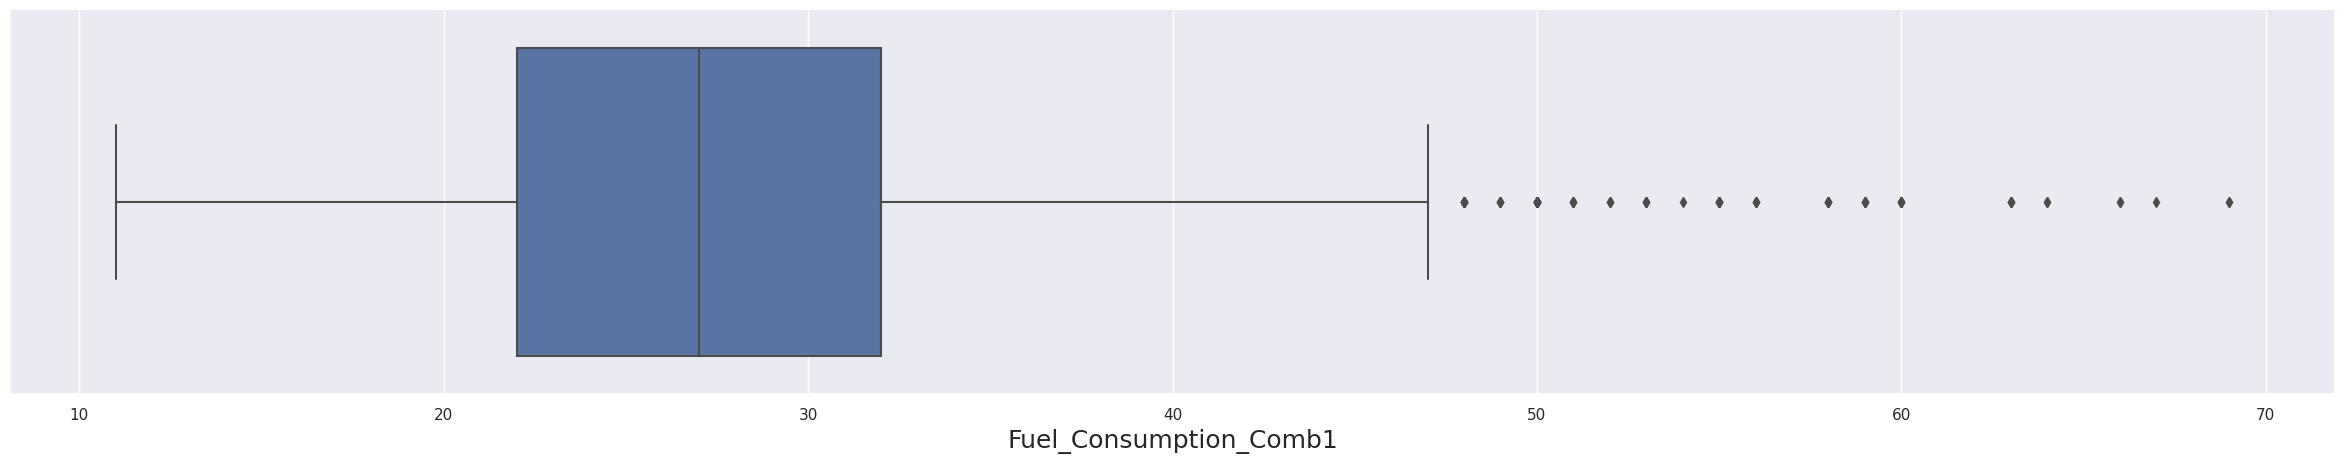

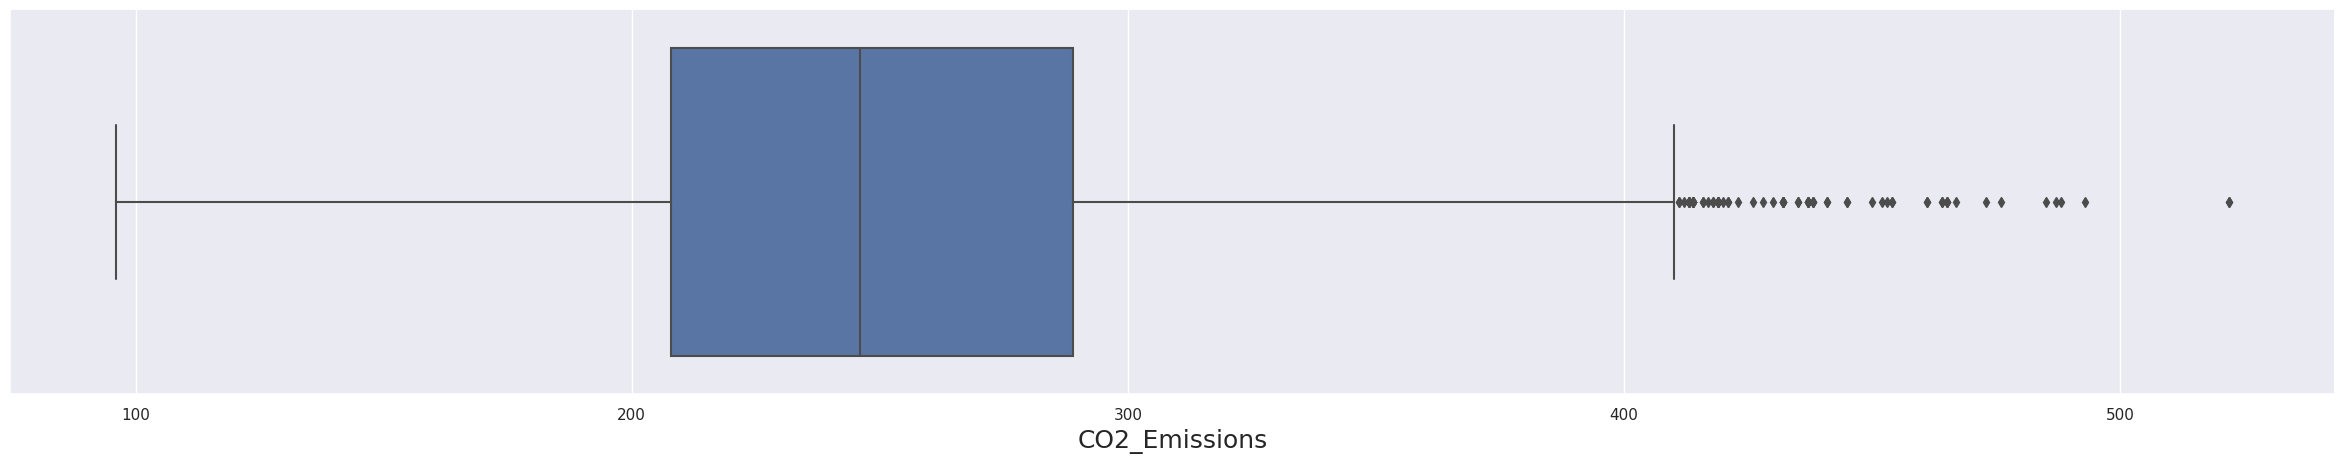

In [36]:
for column in enumerate(df_num_features):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  df_num_features)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

### 5.1.2 Removal of Outliers<a id='rem_out'></a>

**Checking the normality of numeric features**

In [39]:
stat, p_value = shapiro(df_num_features)

print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.5185067653656006
P-Value: 0.0


Since the numeric features are not normal we are removing the outliers using IQR method

In [40]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.reset_index(inplace=True, drop=True)

### 5.1.3 Re-checking Correlation<a id='rec_cor'></a>

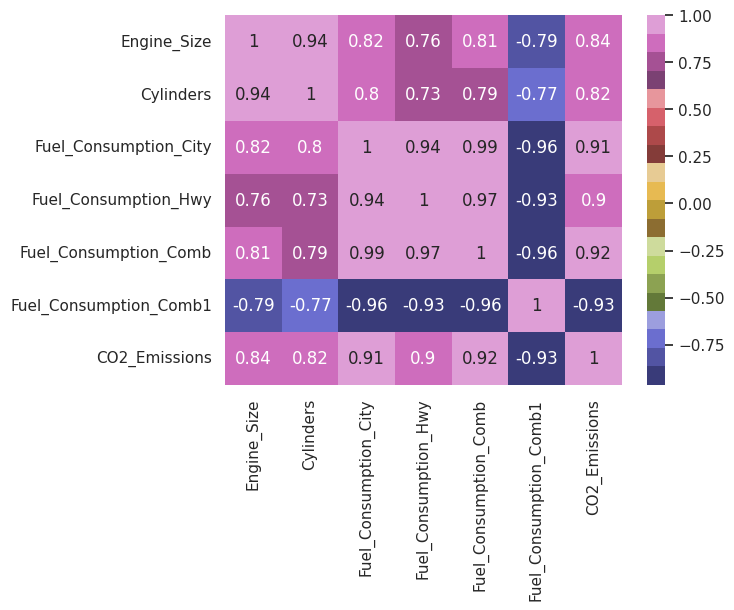

In [41]:
data_num_features = data.select_dtypes(include=np.number)

corr =  data_num_features.corr()

corr =data_num_features.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20b')
plt.show()

There has been a slight change with respect to the correlation between numeric values

## 5.2 Categorical Encoding<a id='cat_enc'></a>

In [46]:
df_dummies = pd.get_dummies(data = data[["Fuel_Type","Transmission","Make_Type","Vehicle_Class_Type"]], drop_first = True)

df_num_features=data.select_dtypes(include=np.number)

df_comb = pd.concat([df_num_features, df_dummies], axis = 1)

In [45]:
df_comb.head()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions,Fuel_Type_E,Fuel_Type_N,Fuel_Type_X,Fuel_Type_Z,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM5,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS4,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
0,2.000000,4,9.900000,6.700000,8.500000,33,196,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2.400000,4,11.200000,7.700000,9.600000,29,221,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,3.500000,6,12.700000,9.100000,11.100000,25,255,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,3.500000,6,12.100000,8.700000,10.600000,27,244,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,3.500000,6,11.900000,7.700000,10.000000,28,230,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


## 5.3 Downloading the processed Data<a id='dnld_dt'></a>

In [62]:
file_path = 'processed_data.csv'
df_comb.to_csv(file_path, index=True)
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 6 Model Building<a id='dnld_dt'></a>

## 6.1 Saving the model in pickle<a id='dnld_pkl'></a>

In [63]:
data=pd.read_csv('/content/processed_data.csv',index_col=0)

X=data.drop(['CO2_Emissions'],axis=1)
y=data['CO2_Emissions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

reg=LinearRegression()
reg.fit(X_train,y_train)


model_filename = 'finalized_model.pkl'
pickle.dump(reg, open(model_filename, 'wb'))

#Download the model file
files.download(model_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 6.1 Saving the model in H5<a id='dnld_h5'></a>

In [64]:
data = pd.read_csv('/content/processed_data.csv', index_col=0)

X = data.drop(['CO2_Emissions'], axis=1)
y = data['CO2_Emissions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

# Save the model in H5 format
model_filename = 'finalized_model.h5'
with h5py.File(model_filename, 'w') as hf:
    hf.create_dataset('model_weights', data=reg.coef_)

# Download the model file
files.download(model_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>